# Lollipop 2

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

g = 9.8

# bicycle frame
m = 15 # in kg
l = 1 # in m

# flywheel
m_flywheel = 0.5 # (mass of the flywheel)
r = 0.15 # radius of the flywheel (m)
I = (1/2) * m_flywheel*(r**2)

def phi_double_dot(theta, theta_dot, gamma=1, zeta=0.1):
    """Computes the phi double dot for a given gamma (proportionality constant) and zeta (damping coefficient), as well as a theta and theta dot value"""
    theta_double_dot = -(gamma)*theta - zeta*theta_dot
    
    # rearrange left hand side to yield phi double dot
    phi_double_dot = (-(m*l**2)/I)*(theta_double_dot - (g/l)*theta)
    
    return phi_double_dot

In [2]:
phi_double_dot(np.radians(5), 0)

2513.274122871835

Let's now iterate over a time series with believably increasing values for theta.

In [3]:
def flywheel_accelerations(time):
    thetas = []
    accelerations = []
    velocities = []
        
    previous_theta = 0
    
    for t in time:
        theta = np.radians(t**3) # for now
        thetas.append(theta)

        theta_dot = (theta - previous_theta)/2 # for now
        velocities.append(theta_dot)

        acceleration = phi_double_dot(theta, theta_dot)
        accelerations.append(acceleration)

        previous_theta = theta
        
    return thetas, accelerations, velocities

time = np.linspace(0, 5.0, num=100)
thetas, accelerations, velocities = flywheel_accelerations(time)

What does theta look when the bike is falling..? We are using a cubic function

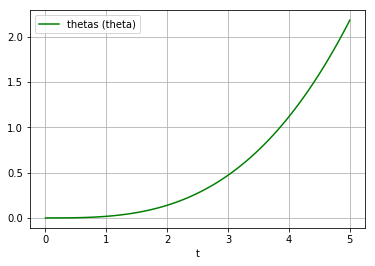

In [4]:
import matplotlib.pyplot as plt
# plt.plot(time, accelerations, 'b', label='accelerations (theta)')
plt.plot(time, thetas, 'g', label='thetas (theta)')
# plt.plot(time, velocities, 'r', label='velocities (theta dot)')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()

That looks reasonable...what about the velocity?

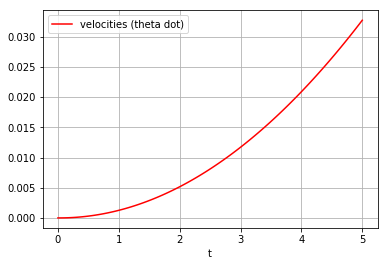

In [5]:
import matplotlib.pyplot as plt
# plt.plot(time, accelerations, 'b', label='accelerations (theta)')
# plt.plot(time, thetas, 'g', label='thetas (theta)')
plt.plot(time, velocities, 'r', label='velocities (theta dot)')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()

Finally, what sort of tilt acceleration do we need to counteract the falling bicycle?

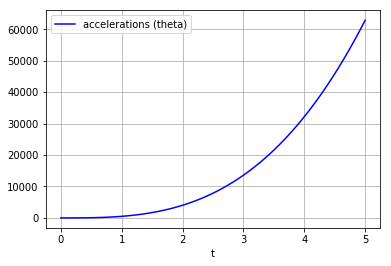

In [6]:
import matplotlib.pyplot as plt
plt.plot(time, accelerations, 'b', label='accelerations (theta)')
# plt.plot(time, thetas, 'g', label='thetas (theta)')
# plt.plot(time, velocities, 'r', label='velocities (theta dot)')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()

A remarkable acceleration (rad/s^2) is needed to steady the bicycle. At its peak, we see 60000 rad/s^2, which works out to 9500 rev/s^2! However, notice how small the acceleration is for small angles. Let's assume we can intervene at t = 1... then our acceleration is a paltry 500 rad/s^2, which seems quite manageable for a small stepper motor.

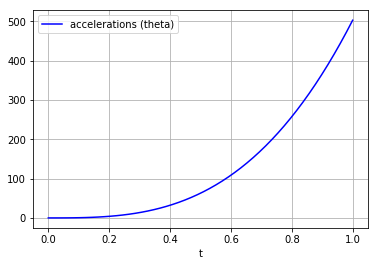

[0.0, 1.4835053863563049e-07, 1.1868043090850439e-06, 4.005464543162024e-06, 9.494434472680351e-06, 1.854381732945381e-05, 3.204371634529619e-05, 5.0884234752021264e-05, 7.595547578144281e-05, 0.00010814754266537463, 0.00014835053863563048, 0.00019745456692402415, 0.0002563497307623695, 0.0003259261333824801, 0.0004070738780161701, 0.0005006830678952528, 0.0006076438062515425, 0.0007288461963168528, 0.000865180341322997, 0.0010175363445017896, 0.0011868043090850439, 0.0013738743383045742, 0.0015796365353921932, 0.0018049810035797162, 0.002050797846098956, 0.002317977166181727, 0.002607409067059841, 0.002919983651965115, 0.003256591024129361, 0.0036181212867843924, 0.0040054645431620226, 0.004419510896494068, 0.00486115045001234, 0.005331273306948654, 0.005830769570534822, 0.006360529344002656, 0.006921442730583976, 0.007514399833510591, 0.008140290756014317, 0.008800005601326964, 0.009494434472680351, 0.01022446747330629, 0.010990994706436594, 0.011794906275303075, 0.012637092283137545

In [7]:
time = np.linspace(0, 1, num=50)
thetas, accelerations, velocities = flywheel_accelerations(time)

import matplotlib.pyplot as plt
plt.plot(time, accelerations, 'b', label='accelerations (theta)')
# plt.plot(time, thetas, 'g', label='thetas (theta)')
# plt.plot(time, velocities, 'r', label='velocities (theta dot)')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()

What if we make our theta a sin function... (to simulate the wobble)

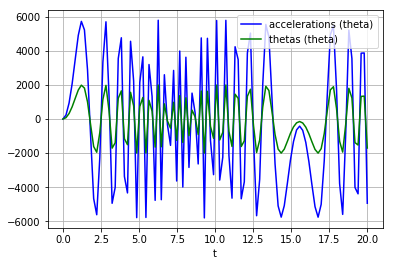

In [8]:
def flywheel_acceleration_sin(time):
    thetas = []
    accelerations = []
    velocities = []
        
    previous_theta = 0
    
    for t in time:
        theta = np.sin(t**2) /5 # we want to cap theta around ~0.2 rad max
        thetas.append(theta)

        theta_dot = (theta - previous_theta)/2 # for now
        velocities.append(theta_dot)

        acceleration = phi_double_dot(theta, theta_dot)
        accelerations.append(acceleration)

        previous_theta = theta
                
    return thetas, accelerations, velocities

time = np.linspace(0, 20.0, num=100)
thetas, accelerations, velocities = flywheel_acceleration_sin(time)

scaling_factor = 10000 # we shouldn't have to put this

plt.plot(time, accelerations, 'b', label='accelerations (theta)')
plt.plot(time, np.multiply(thetas, scaling_factor), 'g', label='thetas (theta)')
# plt.plot(time, velocities, 'r', label='velocities (theta dot)')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()